<a href="https://colab.research.google.com/github/AsmaaKhaled77/Learning-Machine-Learning/blob/main/simple_linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression model

In [7]:
#using panda library to read file data, it is a csv file so used read_csv , df is the data file to use it easily late
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [8]:
# we need to split the data into x , y. the last column called logS is the y in our case.
# the rest of column after drop logS is the x data.
# axis = 1 means represent it into columns, if we wanted it to be rows then axis =0

y = df['logS']
x = df.drop('logS' , axis=1 )


,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [9]:
# then split x,y into training data and testing data.
# random_state is the way of shuffeling the data, but being with a number not none means evry time of running will shuffel data with same way
# and that will produce same data for traing and test. diff number diff way of shuffeling.

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 100)

In [10]:
#Linear Regression Model building

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train , y_train)  # train

LinearRegression()

In [11]:
# apply the trained model to get the predictions

y_lr_train_pred = lr.predict(x_train)   # returns the y predicted when using x_train data
y_lr_test_pred = lr.predict(x_test)

In [13]:
# evaluate performnace using loss function MSE

from sklearn.metrics import mean_squared_error
lr_train_mse = mean_squared_error(y_train , y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test , y_lr_test_pred)
print('LR MSE train data: ' , lr_train_mse)
print('LR MSE test data: ' , lr_test_mse)


LR MSE train data:  1.0075362951093687
LR MSE test data:  1.0206953660861033


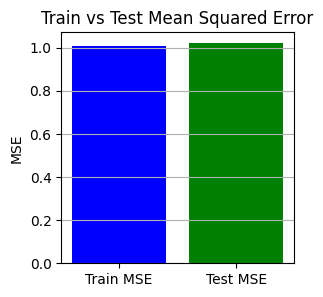

In [42]:
# scatter is a graph of points defined by x and y values.
# 1- plot Train vs Test MSE

import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))

plt.bar(['Train MSE', 'Test MSE'], [lr_train_mse, lr_test_mse], color=['blue', 'green'])
plt.ylabel("MSE")
plt.title("Train vs Test Mean Squared Error")
plt.grid(axis='y')
plt.show()


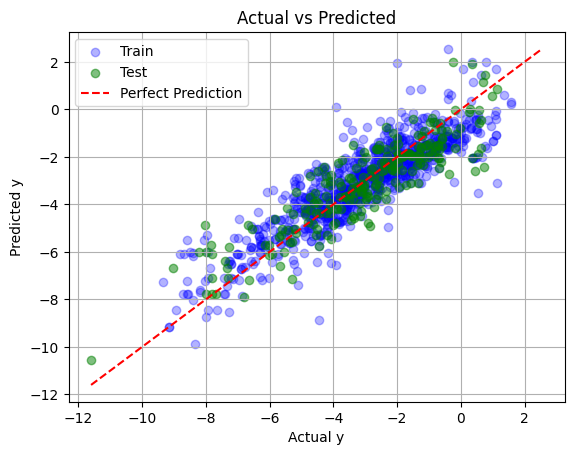

In [48]:
# 2- actual vs predicted output

plt.scatter(y_train, y_lr_train_pred, color='blue', label='Train',alpha=0.3)
plt.scatter(y_test, y_lr_test_pred, color='green', label='Test',alpha=.5)

# Diagonal line (perfect prediction)
min_y = min(y.min(), y_lr_train_pred.min(), y_lr_test_pred.min())
max_y = max(y.max(), y_lr_train_pred.max(), y_lr_test_pred.max())
plt.plot([min_y, max_y], [min_y, max_y], 'r--', label='Perfect Prediction')

plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted")
plt.legend()  # to make table of what colors means
plt.grid(True)
plt.show()

In [59]:
# 3- regression line vs actual data
# as Xs are multidimension so it is not simple to draw regression lins with them :)